In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
train = pd.read_csv('data/train.csv')
train_active = pd.read_csv('data/train_active.csv')

In [56]:
# # to run with all the data
# df_t = train
# df_ta = train_active

# for testing with subset of data
df_t = train[:1000]
df_ta = train_active[:1000]

In [57]:
# Combining train and train_active into df_all

# delete extra columns in train which are not in train_active
df_all = df_t.drop(['deal_probability', 'image', 'image_top_1'],axis = 1)

# add train_active to df_all
df_all = df_all.append(df_ta)

# remove other columns
df_all = df_all.drop(['user_id', 'region', 'parent_category_name', 'city', 'param_1', 'param_2',
                      'param_3', 'title', 'description',
                      'item_seq_number', 'activation_date', 'user_type'], 
                     axis = 1)

# remove other columns from df_t (apart from deal probability)
df_t = df_t.drop(['image', 'image_top_1','user_id', 'region', 'parent_category_name', 
                  'city', 'param_1', 'param_2','param_3', 'title', 'description',
                  'item_seq_number', 'activation_date', 'user_type'],
                 axis = 1)

In [58]:
df_all.head()

,item_id,category_name,price
0,b912c3c6a6ad,Товары для детей и игрушки,400.0
1,2dac0150717d,Мебель и интерьер,3000.0
2,ba83aefab5dc,Аудио и видео,4000.0
3,02996f1dd2ea,Товары для детей и игрушки,2200.0
4,7c90be56d2ab,Автомобили,40000.0


In [59]:
# Calculate category mean and std (thanks Alireza)
price_category_mean = df_all[['price', 'category_name']].groupby('category_name').mean().reset_index()
price_category_std = df_all[['price', 'category_name']].groupby('category_name').std().reset_index()

In [60]:
# initialise Category mean price, Category std and normalized price
df_t['cat_price'] = np.nan
df_t['cat_std'] = np.nan
df_t['norm_price'] = np.nan

In [61]:
df_t.head()

,item_id,category_name,price,deal_probability,cat_price,cat_std,norm_price
0,b912c3c6a6ad,Товары для детей и игрушки,400.0,0.12789,NaN,NaN,NaN
1,2dac0150717d,Мебель и интерьер,3000.0,0.00000,NaN,NaN,NaN
2,ba83aefab5dc,Аудио и видео,4000.0,0.43177,NaN,NaN,NaN
3,02996f1dd2ea,Товары для детей и игрушки,2200.0,0.80323,NaN,NaN,NaN
4,7c90be56d2ab,Автомобили,40000.0,0.20797,NaN,NaN,NaN


In [62]:
# assign category price mean and std values to each item
for x in range (0,len(df_t)-1):
    df_t.cat_price[x] =  price_category_mean.price [ price_category_mean.category_name == df_t.category_name[x] ]
    df_t.cat_std[x] =  price_category_std.price [ price_category_std.category_name == df_t.category_name[x] ] 
    

/Users/dariuscognac/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dariuscognac/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
# Calculate normalized price
df_t['norm_price'] =  (df_t['price'] - df_t['cat_price'] ) / df_t['cat_std'] 

In [64]:
df_t.head()

,item_id,category_name,price,deal_probability,cat_price,cat_std,norm_price
0,b912c3c6a6ad,Товары для детей и игрушки,400.0,0.12789,2597.897196,3400.885401,-0.646272
1,2dac0150717d,Мебель и интерьер,3000.0,0.00000,6784.047059,13639.627569,-0.277430
2,ba83aefab5dc,Аудио и видео,4000.0,0.43177,4208.787879,6696.685168,-0.031178
3,02996f1dd2ea,Товары для детей и игрушки,2200.0,0.80323,2597.897196,3400.885401,-0.116998
4,7c90be56d2ab,Автомобили,40000.0,0.20797,232894.719298,184861.117474,-1.043457


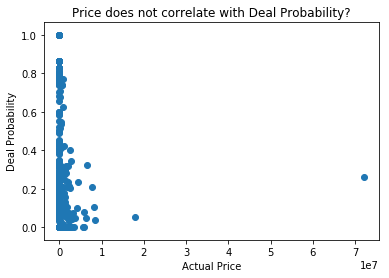

In [79]:
plt.title('Price does not correlate with Deal Probability?')
plt.xlabel('Actual Price')
plt.ylabel('Deal Probability')
plt.scatter(df_t.price, df_t.deal_probability);

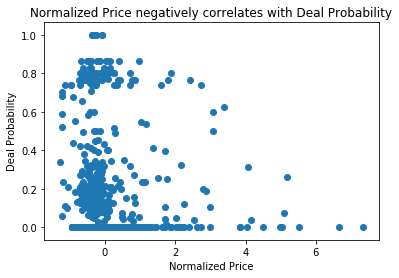

In [80]:
plt.title('Normalized Price negatively correlates with Deal Probability')
plt.xlabel('Normalized Price')
plt.ylabel('Deal Probability')
plt.scatter(df_t.norm_price, df_t.deal_probability);

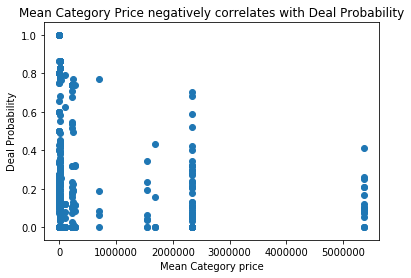

In [81]:
plt.title('Mean Category Price negatively correlates with Deal Probability')
plt.xlabel('Mean Category price')
plt.ylabel('Deal Probability')
plt.scatter(df_t.cat_price, df_t.deal_probability);